# Segmentación de Mercado

## Librerias principales

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

## Cargar el  dataset 

In [5]:
df = pd.read_csv('data.csv')

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### General Info

In [7]:
df.shape

(541909, 8)

In [8]:
df.dtypes.value_counts()

object     5
float64    2
int64      1
dtype: int64

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df.duplicated().any()

True

In [13]:
df.duplicated().sum()

5268

**Comentario**  
- eliminar los registros Nulos de CustomerID
- Convertir el campo InvoceDate a Fecha
- Verificar los registros Duplicados y/o eliminarlos
- Crear campo Totalventas

#### Eliminar NaN

In [14]:
df.dropna(subset=['CustomerID'], axis = 0, inplace=True)

In [15]:
df.isnull().sum().sum()

0

#### Convertir a fecha

In [16]:
df['InvoiceDate']= pd.to_datetime(df['InvoiceDate'])

In [37]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

#### Registros duplicados

In [39]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


**Nota**  
Es nuestro caso los eliminare.

In [40]:
df_cleaned = df.drop_duplicates()

#### Crear campo TotalVentas

In [52]:
df_cleaned['TotalVentas'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']

<ipython-input-52-92b02e2bbb9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['TotalVentas'] = df_cleaned['Quantity'] * df_cleaned['UnitPrice']


## EDA

#### Estadísticas

In [53]:
df_cleaned.describe(include='object').T

,count,unique,top,freq
InvoiceNo,401604,22190,576339,542
StockCode,401604,3684,85123A,2065
Description,401604,3896,WHITE HANGING HEART T-LIGHT HOLDER,2058
Country,401604,37,United Kingdom,356728


In [54]:
df_cleaned.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0
TotalVentas,401604.0,20.613638,430.352218,-168469.6,4.25,11.70,19.80,168469.6


**Comentario**  
- el producto que mas se repite en ventas es WHITE HANGING HEART T-LIGHT HOLDER
- el max total vendido es de 168,469.60 y el min registra **numeros negativos**

#### Country

In [42]:
df_cleaned.Country.value_counts().head(20)

United Kingdom     356728
Germany              9480
France               8475
EIRE                 7475
Spain                2528
Netherlands          2371
Belgium              2069
Switzerland          1877
Portugal             1471
Australia            1258
Norway               1086
Italy                 803
Channel Islands       757
Finland               695
Cyprus                611
Sweden                461
Austria               401
Denmark               389
Japan                 358
Poland                341
Name: Country, dtype: int64

Text(0.5, 1.0, 'Los 20 Paises con Mayor Registros')

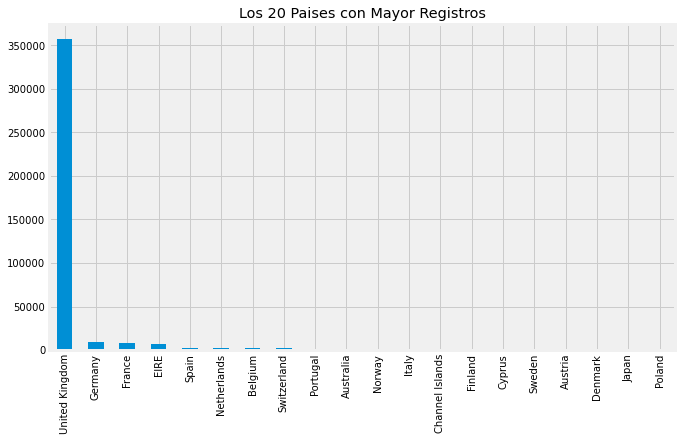

In [47]:
df_cleaned.Country.value_counts().head(20).plot(kind = 'bar', figsize = (10, 6))
plt.title('Los 20 Paises con Mayor Registros')

In [74]:
df_cleaned.groupby('Country', as_index=False)['TotalVentas'].sum()

,Country,TotalVentas
0,Australia,1.370098e+05
1,Austria,1.015432e+04
2,Bahrain,5.484000e+02
3,Belgium,4.091096e+04
4,Brazil,1.143600e+03
5,Canada,3.666380e+03
6,Channel Islands,2.007639e+04
7,Cyprus,1.285876e+04
8,Czech Republic,7.077200e+02
9,Denmark,1.876814e+04


In [87]:
df_cleaned.groupby('Country', as_index=False)['TotalVentas'].mean().sort_values(by= 'TotalVentas', ascending=False)

,Country,TotalVentas
23,Netherlands,120.059696
0,Australia,108.910787
19,Japan,98.716816
31,Sweden,79.360976
9,Denmark,48.247147
21,Lithuania,47.458857
29,Singapore,39.827031
20,Lebanon,37.641778
4,Brazil,35.737500
10,EIRE,33.445054


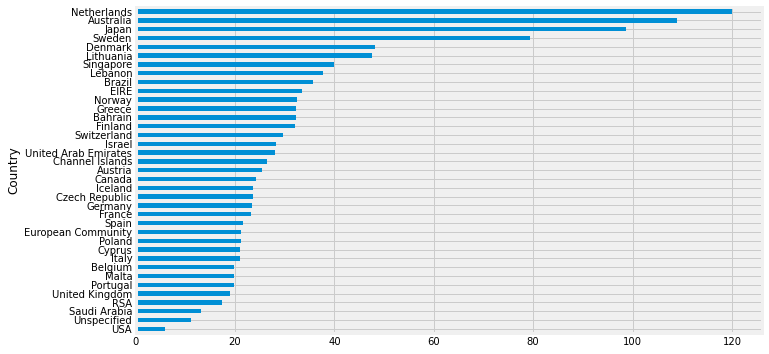

In [84]:
df_cleaned.groupby(['Country'])['TotalVentas'].mean().sort_values().plot(kind='barh', figsize=(10,6));

In [88]:
df_cleaned.groupby(['Country'])['TotalVentas'].mean().idxmax()

'Netherlands'

In [89]:
df_cleaned.groupby(['Country'])['TotalVentas'].mean().idxmin()

'USA'

**Comentario Country**  
- Paises con mayor registros: United Kingdom, Germany, France
- Paises con mayor average de ventas: Netherlands, Australia, Japan  and Sweden
- el Pais con menor Total de ventas es USA

#### Cantidad de veces que los clientes pulsaron X productos

In [64]:
pulsados= df_cleaned.groupby(['CustomerID','InvoiceNo'], as_index=False)['InvoiceNo'].count().sort_values(by= 'InvoiceNo', ascending = False)
pulsados.rename(columns={'InvoiceNo': 'NoVeces'}, inplace=True)

In [68]:
pulsados.head()

,CustomerID,NoVeces
6810,14096.0,542
6812,14096.0,533
6813,14096.0,529
6811,14096.0,442
6808,14096.0,435


In [69]:
pulsados.tail()

,CustomerID,NoVeces
13192,15738.0,1
6996,14145.0,1
13200,15738.0,1
13201,15738.0,1
0,12346.0,1


In [73]:
pulsados.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,22190.0,15238.498738,1733.149624,12346.0,13755.0,15136.0,16746.0,18287.0
NoVeces,22190.0,18.098423,23.363888,1.0,3.0,12.0,24.0,542.0


**Comentario Usuarios cantidad de veces**  
- el máximo de cantidad de compras online es de 542 y el mínimo es de 1 compra

#### TotalVentas

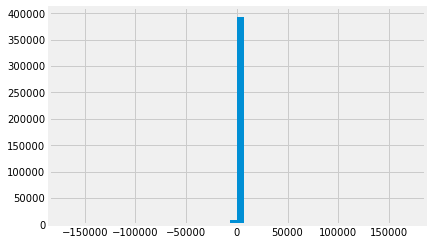

In [91]:
df_cleaned['TotalVentas'].hist(bins=50);

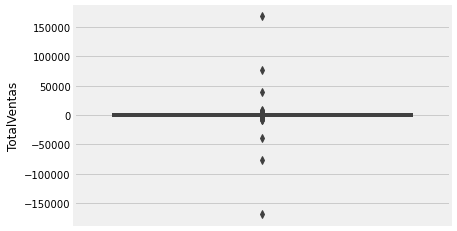

In [94]:
sns.boxplot(data = df_cleaned, y = 'TotalVentas');

In [95]:
len(df_cleaned[df_cleaned['TotalVentas']<0])

8872

In [96]:
df_cleaned[df_cleaned['TotalVentas']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalVentas
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


**Comentario de ToTal de Ventas**  
- Cantidad de ventas o Regitros negativos = 8,872 esto se debe a que hubo devolución en la cantidad
- Filtrar los registros negativos

In [98]:
df_sin_negativos = df_cleaned[df_cleaned['TotalVentas']>0]

In [109]:
basket_price =df_sin_negativos.groupby(['CustomerID', 'InvoiceNo'], as_index=False)['TotalVentas'].sum().sort_values(by= 'TotalVentas',ascending =False)
basket_price.head(20)

,CustomerID,InvoiceNo,TotalVentas
12888,16446.0,581483,168469.60
0,12346.0,541431,77183.60
9019,15098.0,556444,38970.00
15867,17450.0,567423,31698.16
164,12415.0,556917,22775.93
18012,18102.0,572209,22206.00
15864,17450.0,567381,22104.80
169,12415.0,563614,21880.44
10897,15749.0,550461,21535.90
7435,14646.0,572035,20277.92


In [112]:
basket_price['TotalVentas'].describe()

count     18532.00000
mean        479.56016
std        1678.08258
min           0.38000
25%         157.34000
50%         302.57500
75%         469.57000
max      168469.60000
Name: TotalVentas, dtype: float64

In [116]:
basket_price['TotalVentas'].value_counts().sort_values(ascending = False)

15.00     56
30.00     22
17.40     21
102.00    19
22.20     17
          ..
111.23     1
47.04      1
455.82     1
277.60     1
351.01     1
Name: TotalVentas, Length: 16169, dtype: int64

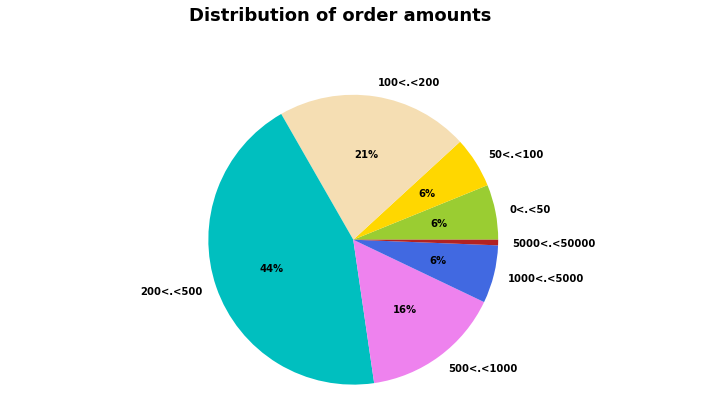

In [117]:
# Purchase count
price_range = [0, 50, 100, 200, 500, 1000, 5000, 50000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0: continue
    val = basket_price[(basket_price['TotalVentas'] < price) &
                       (basket_price['TotalVentas'] > price_range[i-1])]['TotalVentas'].count()
    count_price.append(val)

# Representation of the number of purchases / amount       
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat', 'c', 'violet', 'royalblue','firebrick']
labels = [ '{}<.<{}'.format(price_range[i-1], s) for i,s in enumerate(price_range) if i != 0]
sizes  = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]
ax.pie(sizes, explode = explode, labels=labels, colors = colors,
       autopct = lambda x:'{:1.0f}%'.format(x) if x > 1 else '',
       shadow = False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Distribution of order amounts", ha='center', fontsize = 18);

**Comentario**  
- el 44% de precio de  ventas esta entre 200 a 500

### Description of products

In [99]:
df_sin_negativos['Description'].nunique()

3877

In [100]:
df_sin_negativos['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2016
REGENCY CAKESTAND 3 TIER              1713
JUMBO BAG RED RETROSPOT               1615
ASSORTED COLOUR BIRD ORNAMENT         1395
PARTY BUNTING                         1389
                                      ... 
BLACK DROP EARRINGS W LONG BEADS         1
LUNCH BAG RED SPOTTY                     1
MARIE ANTOIENETT TRINKET BOX GOLD        1
PURPLE ANEMONE ARTIFICIAL FLOWER         1
ZINC PLANT POT HOLDER                    1
Name: Description, Length: 3877, dtype: int64

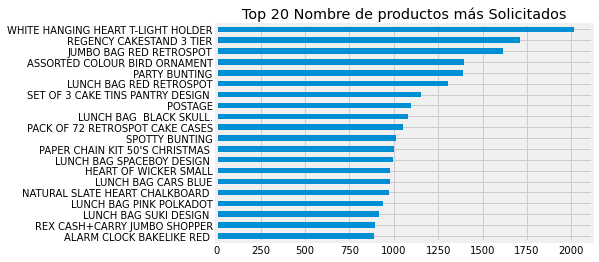

In [104]:
df_sin_negativos['Description'].value_counts().head(20).sort_values().plot(kind='barh')
plt.title('Top 20 Nombre de productos más Solicitados')
plt.show()

In [155]:
descrip = df_sin_negativos.groupby(['Description', 'Country'], as_index=False)['Country'].count().sort_values(by= 'Country', ascending= False)
descrip

,Description,Country
18403,WHITE HANGING HEART T-LIGHT HOLDER,1929
8272,JUMBO BAG RED RETROSPOT,1461
13444,REGENCY CAKESTAND 3 TIER,1417
1100,ASSORTED COLOUR BIRD ORNAMENT,1320
11196,PARTY BUNTING,1300
...,...,...
8764,LAUREL STAR ANTIQUE SILVER,1
8766,LAVENDER INCENSE 40 CONES IN TIN,1
8769,LAVENDER SCENT CAKE CANDLE,1
8771,LAVENDER SCENT CAKE CANDLE,1


**Comentario**  
Productos con mayor Salida
- WHITE HANGING HEART T-LIGHT HOLDER
- REGENCY CAKESTAND 3 TIER      
- JUMBO BAG RED RETROSPOT               
- ASSORTED COLOUR BIRD ORNAMENT         
- PARTY BUNTING                         
